In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [3]:
df=pd.read_csv('loan_approval_dataset (2).csv')


In [4]:
x=df.drop(['Loan_Approved'],axis=1)
y=df['Loan_Approved']

In [5]:
num_col=x.select_dtypes(exclude='object').columns
cat_col=x.select_dtypes(include='object').columns


In [6]:
scaler=StandardScaler()
onehot=OneHotEncoder()

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [8]:
x_train[num_col]=scaler.fit_transform(x_train[num_col])
label=onehot.fit_transform(x_train[cat_col])
Value=label.toarray()
name=onehot.get_feature_names_out()
cat_df=pd.DataFrame(Value,columns=name)


In [9]:
x_train_final=pd.concat([x_train[num_col].reset_index(drop=True),cat_df.reset_index(drop=True)],axis=1)


In [10]:
x_test[num_col]=scaler.transform(x_test[num_col])
label1=onehot.transform(x_test[cat_col])
Value1=label1.toarray()
name1=onehot.get_feature_names_out()
cat_df1=pd.DataFrame(Value1,columns=name1)


In [11]:
x_test_final=pd.concat([x_test[num_col].reset_index(drop=True),cat_df1.reset_index(drop=True)],axis=1)


In [12]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=1,max_leaf_nodes=3)
model.fit(x_train_final,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,3
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
x_train_predict=model.predict(x_train_final)
x_test_predict=model.predict(x_test_final)

In [14]:
print('Training accuracy--->',accuracy_score(y_train,x_train_predict))
print('Testing accuracy--->',accuracy_score(y_test,x_test_predict))


Training accuracy---> 0.5575
Testing accuracy---> 0.5


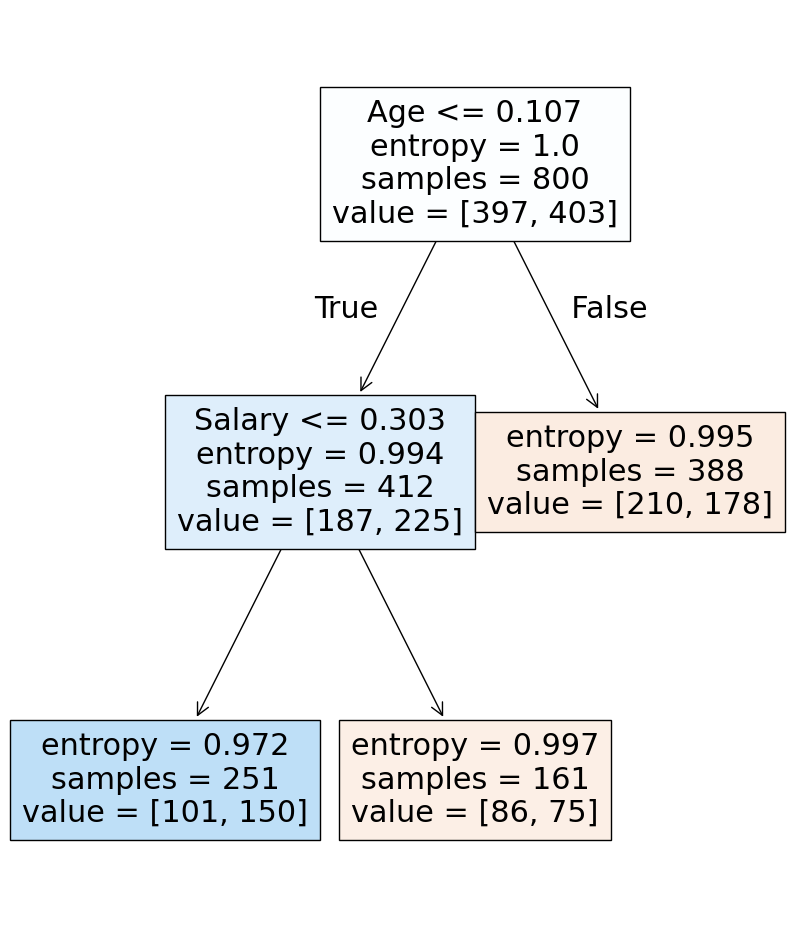

In [16]:
plt.figure(figsize=(10,12))
plot_tree(model,feature_names=x_test_final.columns,filled=True)
plt.show()
